In [1132]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [1144]:
x_train = [ [ 0.0, 0.0 ] ,  [ 0.0, 1.0 ] , [ 1.0, 0.0 ], [ 1.0, 1.0 ]  ]
y_train = [ 0.0, 1.0, 1.0, 1.0 ]

In [1134]:
x_train = [ [ 0.0, 0.0 ] ,  [ 0.0, 1.0 ] , [ 1.0, 0.0 ], [ 1.0, 1.0 ]  ]
y_train = [ 0.0, 0.0, 0.0, 1.0 ]

In [1145]:
from micrograd.micrograd.engine import Value
weight1 = Value(0.2, label='weight1')
weightbias = Value(0.5, label='weightbias')
weight2 = Value(0.3, label='weight1')
bias = 1
learning_rate = -0.001
input1 = Value(1.0, label='input1')
input2 = Value(1.0, label='input1')



In [1165]:

import random

losses = []
weights = []
maxiter = 100000
lx = len(x_train)
for ite in range(maxiter) :

    if ite < 100:
        learning_rate = -0.1
    if ite < 1000:
        learning_rate = -0.1
    elif ite < 5000:
        learning_rate = -0.01
    elif ite < 10000:
        learning_rate = -0.001
    elif ite < 10000:
        learning_rate = -0.0001


    i = ite % lx
    input1.data = x_train[i][0]
    # input2.data = x_train[i][1]
    neuron = ((input1 * weight1)  +(input2 * weight2)  + (bias * weightbias))
    # neuron = ((input1 * weight1)  +(input2 * weight2)  + (bias * weightbias))
    result = perceptron = neuron.tanh()
    expected = y_train[i]
    loss = (expected - perceptron) ** 2


    # print("i", i)
    # print("input1", input1.data)
    # print("input2", input2.data)
    # print("expected", expected)
    # print("result", result)
    # print("loss", loss)

    losses.append(loss.data)
    loss.backward()

    # print("weight1", weight1)
    # print("weight2", weight2)
    # print("bias", weightbias)

    weights.append([weight1.data, weight2.data, weightbias.data, learning_rate])

    weight1.data += learning_rate * weight1.grad
    weight2.data += learning_rate * weight2.grad
    weightbias.data += learning_rate * weightbias.grad


    # print("after : weight1", weight1.data)
    # print("after : weight2", weight2.data)
    # print("after : bias", weightbias.data)
    # print("----")
    # zero grad
    for node in trace(loss)[0]:
        node.grad = 0.0


In [1166]:
import numpy as np

nweights = np.array(weights)
# nweights2 = np.reshape(nweights, (3, -1), order='F')
nweights2 = np.stack(nweights, axis=1)
nweights2

array([[ 1.70816779e+00,  1.70816779e+00,  1.70816779e+00, ...,
         1.84099982e+00,  1.84099982e+00,  1.84100091e+00],
       [ 1.76100778e-01,  1.00993770e-01,  2.06650856e-01, ...,
         1.75015107e-01,  1.75763751e-01,  1.75764840e-01],
       [ 3.76100778e-01,  3.00993770e-01,  4.06650856e-01, ...,
         3.75015107e-01,  3.75763751e-01,  3.75764840e-01],
       [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
        -1.00000000e-03, -1.00000000e-03, -1.00000000e-03]])

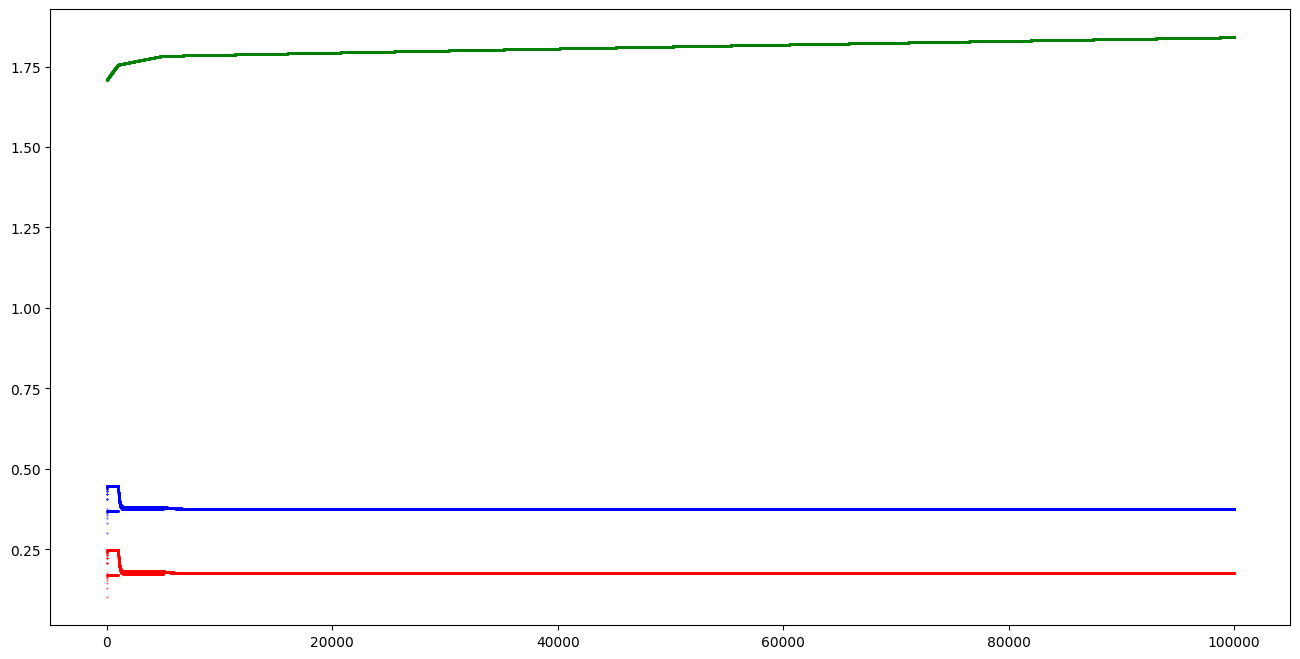

In [1167]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(range(maxiter), nweights2[0], c='green', s=0.1, label='weight1')
plt.scatter(range(maxiter), nweights2[1], c='red', s=0.1, label='wegith2')
plt.scatter(range(maxiter), nweights2[2], c='blue', s=0.1, label='bias')
plt.show()




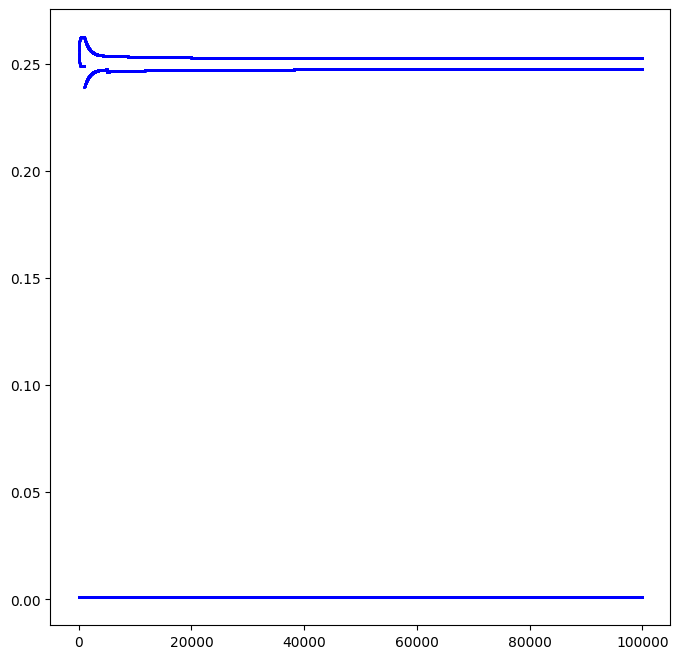

In [1160]:

nploss = np.array(losses)
plt.figure(figsize=(8, 8))
plt.scatter(range(maxiter), nploss, c='blue', s=0.4, label='learning ?')
plt.show()

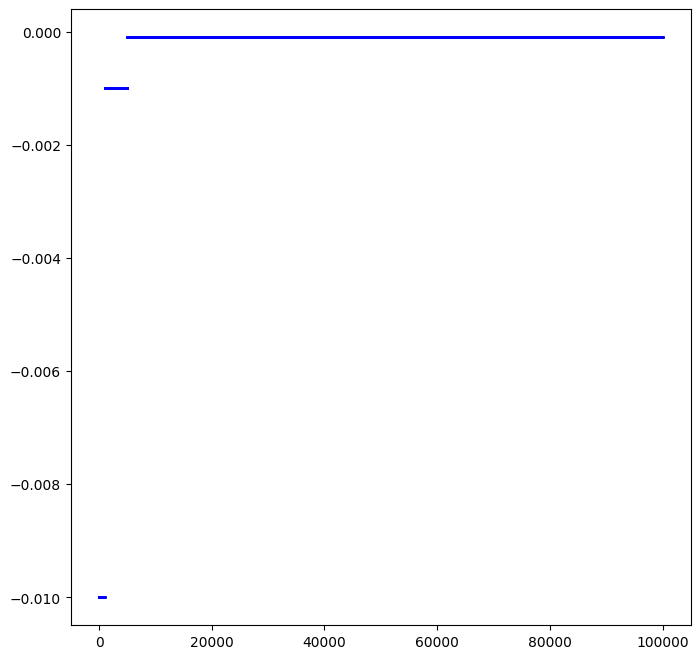

In [1161]:

plt.figure(figsize=(8, 8))
plt.scatter(range(maxiter), nweights2[3], c='blue', s=0.1, label='rate')
plt.show()

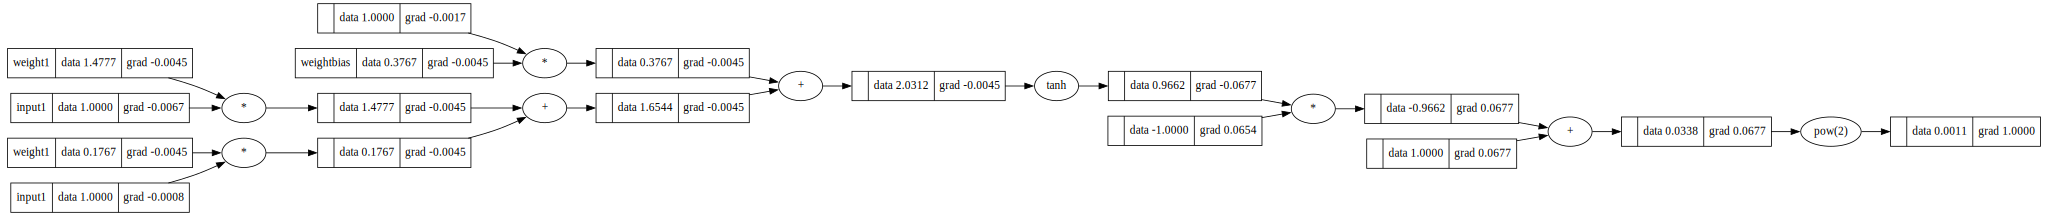

In [1154]:
loss.backward()
draw_dot(loss)



In [1141]:

losses



[0.44094483226775594,
 0.43984192275988787,
 0.5781224120197743,
 0.057825596508184286,
 0.4380858845677499,
 0.43697889878210383,
 0.5753641335617921,
 0.05870649923725754,
 0.4352179794395833,
 0.4341069949118688,
 0.5725914900580366,
 0.059600852122653085,
 0.43234137308930215,
 0.4312264696845845,
 0.5698046734045729,
 0.06050879506356587,
 0.429456328657174,
 0.42833758856930576,
 0.5670038839994921,
 0.061430466132086775,
 0.4265631162007594,
 0.42544062394952464,
 0.5641893308125864,
 0.06236600140999292,
 0.423662012670421,
 0.42253585509632263,
 0.5613612314478933,
 0.06331553482161689,
 0.42075330187705334,
 0.41962356813368196,
 0.5585198121987573,
 0.06427919796290421,
 0.4178372744518344,
 0.4167040559957527,
 0.5556653080950641,
 0.06525711992678117,
 0.41491422779780135,
 0.4137776183758856,
 0.5527979629423005,
 0.06624942712497002,
 0.41198446603306493,
 0.4108445616672473,
 0.5499180293521064,
 0.06725624310640364,
 0.4090482999254928,
 0.4079051988948498,
 0.54702576